In [1]:
#importing pandas libarary to read the csv file
import pandas as pd
dataset = pd.read_csv('estate_data.csv')

In [2]:
dataset.head()

,number_of_rooms,floor,area,address,date,price
0,1,1,58.0,Сомони,Сегодня 21:56,330000
1,1,14,68.0,92 мкр,Сегодня 21:56,340000
2,3,8,50.0,NaN,Сегодня 21:55,700000
3,3,14,84.0,112 мкр,Сегодня 21:51,700000
4,3,3,83.0,фабрика Ширин,Сегодня 21:48,415000


In [3]:
#dropping some columns as we do not need them
dataset_final = dataset.drop(['address', 'date'], axis=1)

/home/uca/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

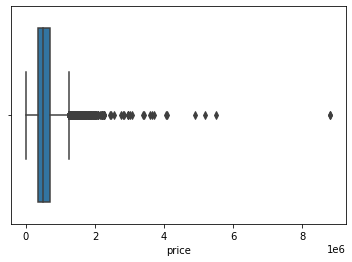

In [4]:
#boxplot of target variable
import seaborn as sb
sb.boxplot(dataset_final['price'])

In [5]:
#now lets find the outliers
q1 = dataset_final.quantile(0.25)
q3 = dataset_final.quantile(0.75)

#find inter quartile range (iqr)
iqr = q3 - q1
iqr

number_of_rooms         1.0
floor                   7.0
area                   43.0
price              357000.0
dtype: float64

In [6]:
#now find lower and upper quartile range
lower_range = q1 - 1.5*iqr
upper_range = q3 + 1.5*iqr

print(lower_range)


number_of_rooms         0.5
floor                  -7.5
area                  -14.5
price             -192500.0
dtype: float64


In [7]:
print(upper_range)

number_of_rooms          4.5
floor                   20.5
area                   157.5
price              1235500.0
dtype: float64


<AxesSubplot:xlabel='price', ylabel='Density'>

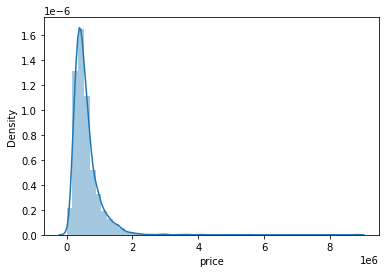

In [8]:
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
normality = sb.distplot(dataset_final['price'])
normality

In [9]:
dataset_final['price'].skew()

5.235117769537853

In [10]:
import numpy as np
np.log(dataset_final['price'])

0       12.706848
1       12.736701
2       13.458836
3       13.458836
4       12.936034
          ...    
5574    13.304685
5575    13.101957
5576    12.797242
5577    14.220976
5578    12.626919
Name: price, Length: 5579, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

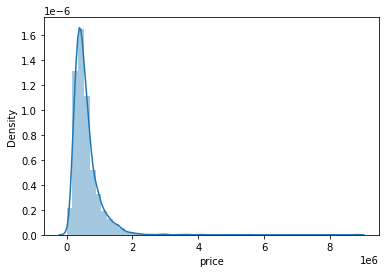

In [11]:
sb.distplot(dataset_final['price'])

In [12]:
dataset_final['price'].skew()

5.235117769537853

In [13]:
hous_num = dataset_final.select_dtypes(include = ['float64', 'int64'])
hous_num_corr = hous_num.corr()['Price'][:-1] # -1 means that the latest row is SalePrice
top_features = hous_num_corr[abs(hous_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(top_features), top_features))

KeyError: 'Price'

In [5]:
#lets find out correlation of different independent variables and dependent variable

corr1 = dataset_final[['number_of_rooms', 'price']].dropna()
corr1.head()

,number_of_rooms,price
0,1,330000
1,1,340000
2,3,700000
3,3,700000
4,3,415000


In [6]:
corr1.corr()

,number_of_rooms,price
number_of_rooms,1.000000,0.594876
price,0.594876,1.000000


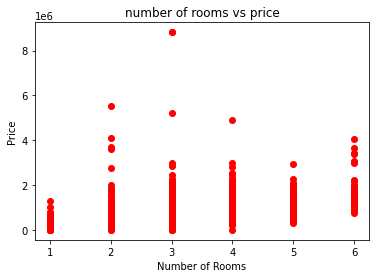

In [25]:
import matplotlib.pyplot as plt

plt.scatter(dataset_final[["number_of_rooms"]].dropna(), dataset_final[["price"]].dropna(), color='red')
plt.title('number of rooms vs price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

In [9]:
corr2 = dataset_final[['floor', 'price']].dropna()
corr2.head()

,floor,price
0,1,330000
1,14,340000
2,8,700000
3,14,700000
4,3,415000


In [10]:
corr2.corr()

,floor,price
floor,1.000000,0.094023
price,0.094023,1.000000


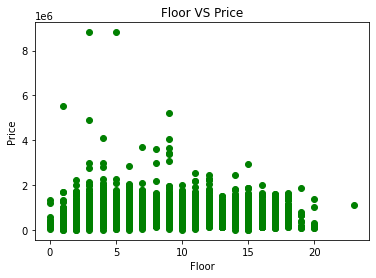

In [22]:

plt.scatter(dataset_final[['floor']].dropna(), dataset_final[["price"]].dropna(), color='green')
plt.title("Floor VS Price")
plt.xlabel("Floor")
plt.ylabel("Price")
plt.show()

In [11]:
corr3 = dataset_final[['area', 'price']].dropna()
corr3.head()

,area,price
0,58.0,330000
1,68.0,340000
2,50.0,700000
3,84.0,700000
4,83.0,415000


In [12]:
corr3.corr()

,area,price
area,1.00000,0.71813
price,0.71813,1.00000


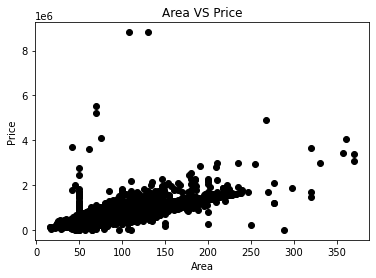

In [21]:

plt.scatter(dataset_final[['area']].dropna(), dataset_final[['price']].dropna(), color='black')
plt.title("Area VS Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [9]:
#distributing data into independent and dependent variables
x_dataset_final = dataset_final.iloc[:, :-1]
y_dataset_final = dataset_final.iloc[:, -1]

In [11]:
y_dataset_final.head()

0    330000
1    340000
2    700000
3    700000
4    415000
Name: price, dtype: int64

In [14]:
#now lets split data into training and testing
#import sklearn's train_test_split function
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_dataset_final, y_dataset_final, test_size=0.2, random_state=0)

In [21]:
#now lets apply Regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
#Now lets predict using the regressor
y_pred = lr.predict(x_test)

In [23]:
y_pred

array([330517.45857662, 470952.1279512 , 771645.75594185, ...,
       931504.82817607, 755604.04586713, 583836.90119205])

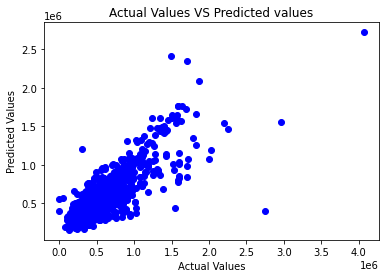

In [24]:
#plotting a graph to examine the relationship
import matplotlib.pyplot as plt
test = plt
test.scatter(y_test, y_pred, color="blue")
test.title("Actual Values VS Predicted values")
test.xlabel("Actual Values")
test.ylabel("Predicted Values")
test.show()

In [28]:
#lets validate and see how accurate our model performs
from sklearn.metrics import mean_absolute_error, r2_score
import math as math
print("Mean Absolute Error (MAE) is ", mean_absolute_error(y_test, y_pred))
print("Root Mean Absolute Error (RMAE) is ", math.sqrt(mean_absolute_error(y_test, y_pred)))
print("R2 is ", r2_score(y_test, y_pred))

Mean Absolute Error (MAE) is  130552.38928668895
Root Mean Absolute Error (RMAE) is  361.3203416453175
R2 is  0.6733185777321709
